In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from config import IMG_WIDTH, IMG_HEIGHT, IMG_DEPTH, CLASSIFIER_MODEL_NAME, ENCODER_MODEL_NAME

In [3]:
encoder = load_model(ENCODER_MODEL_NAME)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
# load dataset
# MNIST, for now
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_width, img_height, img_depth = x_train.shape[1], x_train.shape[2], 1

In [5]:
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [6]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Data preparation
x_train = x_train/256
x_test = x_test/256
x_train = x_train.reshape(len(x_train), img_width, img_height, img_depth)
x_test = x_test.reshape(len(x_test), img_width, img_height, img_depth)

In [8]:
classes, decoded_imgs = encoder.predict(x_test)

In [43]:
def compare_outputs(base, prediction, given_class, position):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(base[position].reshape(IMG_WIDTH, IMG_HEIGHT))
    ax[0].set_title('base')
    ax[1].imshow(prediction[position].reshape(IMG_WIDTH, IMG_HEIGHT))
    ax[1].set_title('prediction')
    print('Predicted: %s' % np.argmax(given_class[position]))
    print('Actual: %s' % np.argmax(y_test[position]))

Predicted: 5
Actual: 5


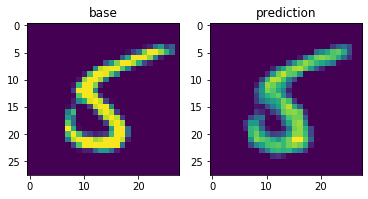

In [83]:
compare_outputs(x_test, decoded_imgs, classes, np.random.randint(0, len(x_test)))